## 0. Import package

In [2]:
#include <stdio.h>
#include <stdlib.h>
#include <math.h>

# 1. read data

## 2. Train / Validation split

In [18]:
rand = np.arange(420)
np.random.shuffle(rand)

# Train
train_no = rand[:380]

# Validation
val_no=np.setdiff1d(rand,train_no)

In [19]:
X_train, X_val = X[train_no,:,:], X[val_no,:,:]
Y_train, Y_val = Y[train_no], Y[val_no]

print("X_train, X_val shape :", X_train.shape, X_val.shape)

X_train, X_val shape : (380, 16, 16) (40, 16, 16)


## 3. define function
### (sigmoid, softmax, initialization)

In [6]:
double Sigmoid(double x) { return 1 / (1 + exp(-x)); }
double dSigmoid(double x) { 
    double sig = sigmoid(x);
    return sig * (1 - sig); }
double Softmax(double input) {
    double exp_val = exp(input);
    double softmax_output = exp_val;
    return softmax_output;
}
double softmax_derivative_single_value(double input) {
    double softmax_output = Softmax(input);
    double derivative = softmax_output * (1.0 - softmax_output);
    return derivative;
}

double init_weight() { return ((double)rand()) / ((double)RAND_MAX); }



## 4. forward and backward pass

In [7]:
def forward_backward_pass(x,y): # (64,256) (64, )
  targets = np.zeros((len(y),7), np.float32)  # (64, 7)
  #print("targets:", targets.shape)  (128 7)
  #print(y)
  targets[range(targets.shape[0]),y] = 1
  
  # forward pass
  z_w1 = x.dot(w1)
  a_w1 = sigmoid(z_w1)    
  z_w2 = a_w1.dot(w2)     
  out  = softmax(z_w2)       

  # backpropagation
  error = 2*(out-targets)/out.shape[0]*d_softmax(z_w2)
  d_w2 = a_w1.T@error
  #print("error, updata_l2 shape :", error.shape, update_w2.shape) # (128 10) (128 10)  
  error = ((w2).dot(error.T)).T*d_sigmoid(z_w1)
  d_w1 = x.T@error
  #print("error, updata_l1 shape :", error.shape, d_w1.shape) # (128 128) (784 128)

  return out, d_w1, d_w2 

## 5. Training

In [8]:
epochs = 18000  # num of epochs
lr = 0.001      # Learning Rate
batch = 128     # batch size

losses,accuries,val_accuracies=[],[],[]

for i in range(epochs):
    #randomize and create batches
    sample=np.random.randint(0,X_train.shape[0],size=(batch))
    x=X_train[sample].reshape((-1, 16*16))
    y=Y_train[sample]
    #print("x y shape:", x.shape, y.shape) # (128,256) (128,)

    out, d_w1, d_w2 = forward_backward_pass(x,y)   
    category = np.argmax(out, axis=1)
    
    accuracy = (category==y).mean()
    accuries.append(accuracy.item())
    
    loss = ((category-y)**2).mean()
    losses.append(loss.item())
    
    #SGD 
    w1 = w1-lr*d_w1
    w2 = w2-lr*d_w2
    #l3=w3-lr*d_w3
    


    #testing our model using the validation set every 20 epochs
    if(i%20==0):    
      X_val = X_val.reshape((-1, 16*16))
      val_out = np.argmax(softmax(sigmoid(X_val.dot(w1)).dot(w2)), axis=1)
      val_acc = (val_out==Y_val).mean()
      val_accuracies.append(val_acc.item())
    if(i%1000==0): print(f'For {i}th epoch ) train loss: {loss:.3f} train acc: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')

For 0th epoch ) train loss: 6.945 train acc: 0.172 | validation accuracy:0.150


C:\Users\조영욱\AppData\Local\Temp\ipykernel_6016\2963001454.py:5: RuntimeWarning: overflow encountered in square
  return (np.exp(-z)) / ((np.exp(-z)+1)**2)


For 1000th epoch ) train loss: 4.914 train acc: 0.445 | validation accuracy:0.425
For 2000th epoch ) train loss: 3.664 train acc: 0.508 | validation accuracy:0.450
For 3000th epoch ) train loss: 3.406 train acc: 0.547 | validation accuracy:0.450
For 4000th epoch ) train loss: 2.320 train acc: 0.680 | validation accuracy:0.475
For 5000th epoch ) train loss: 2.930 train acc: 0.594 | validation accuracy:0.500
For 6000th epoch ) train loss: 3.133 train acc: 0.633 | validation accuracy:0.500
For 7000th epoch ) train loss: 2.203 train acc: 0.633 | validation accuracy:0.500
For 8000th epoch ) train loss: 2.359 train acc: 0.609 | validation accuracy:0.525
For 9000th epoch ) train loss: 1.570 train acc: 0.727 | validation accuracy:0.525
For 10000th epoch ) train loss: 1.609 train acc: 0.648 | validation accuracy:0.475
For 11000th epoch ) train loss: 1.633 train acc: 0.648 | validation accuracy:0.525
For 12000th epoch ) train loss: 1.680 train acc: 0.586 | validation accuracy:0.475
For 13000th e

## 6. Testing

In [9]:
X_test = X_test.reshape((-1, 16*16))
test_out = np.argmax(softmax(sigmoid(X_test.dot(w1)).dot(w2)), axis=1)

## 7. Result

expected: t result: t
expected: u result: u
expected: v result: y
expected: w result: w
expected: x result: y
expected: y result: y
expected: z result: z
expected: t result: t
expected: u result: t
expected: v result: v
expected: w result: w
expected: x result: w
expected: y result: y
expected: z result: z
expected: t result: t
expected: u result: u
expected: v result: v
expected: w result: w
expected: x result: w
expected: y result: y
Test accuracy = 0.7500


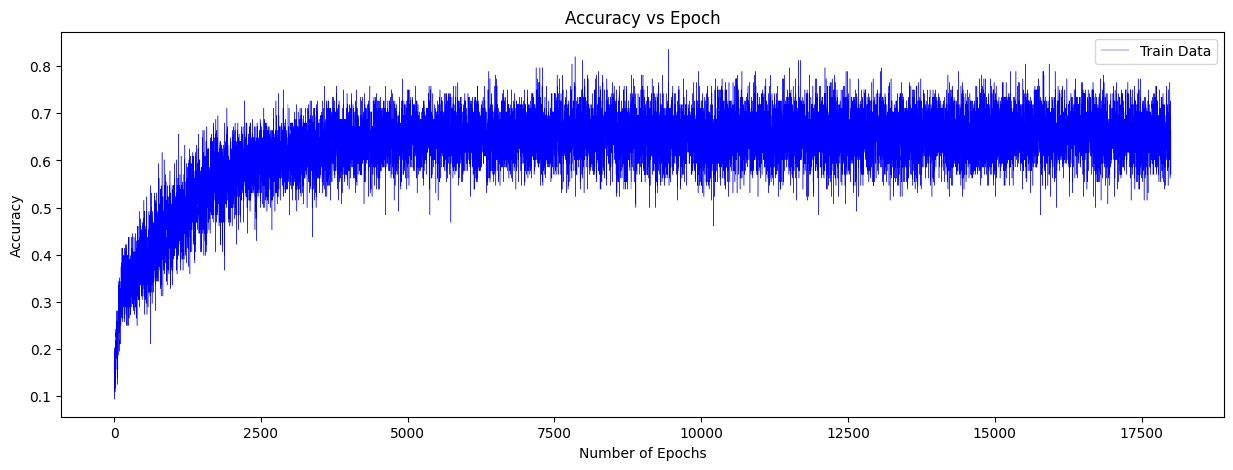

In [10]:
alphabet_mapping = {
    0: 't',
    1: 'u',
    2: 'v',
    3: 'w',
    4: 'x',
    5: 'y',
    6: 'z',
}
test_result = [alphabet_mapping[num] for num in test_out]
test_target = [alphabet_mapping[num] for num in Y_test]

for i in range(20):
   print("expected:", test_target[i], "result:", test_result[i])


test_acc=(test_out==Y_test).mean().item()
test_accuries = []; test_accuries.append(test_acc)

print(f'Test accuracy = {test_acc:.4f}')
np.savez('weights', w1, w2)

plt.figure(figsize=(15, 5))
plt.plot(range(len(accuries)),
         accuries, 'b', label='Train Data', linewidth=0.3)
plt.title('Accuracy vs Epoch')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()